# Ejercicio de Regresion Lineal

En este notebook

## Prediccion: Cantidad de ocaciones en que se comparte un articulo de un Blog

Se inicia importando, ajustando y visualizando los datos:

In [1]:
#Importamos librerias y ajustes necesarios.

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize']= (16,9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Se carga el archivo de dato de entradas csv como dataset de Pandas.Los datos provienen del sitio wed https://www.kdnuggets.com
data = pd.read_csv("./articulos de blog ml.csv")


Pandas es una libreria de Python destinadaa a analisis de datos, que proporciona estructuras de datos flexibles las cuales permiten trabajar con ellos de forma eficienete. Pandas ofrece las siguientes estructuras de datos:Series:Son arrays con indexacion (arrays con indice o etiquetado), similar a los diccionarios.Puede generarse a partir de diccionarios de la listas. Dataframe: son estrucuturas de datos similaes a las tables de base de datos relaciones con SQL. Panel, Panel 4D y PanelIN: Son estructuras de datos que permiten trabajar con mas de dos dimensiones.

In [3]:
#Revisamos la dimension (registros x columnas) que contiene el archivo
data.shape

(161, 8)

In [4]:
#Podemos revisar los primeros para comprobar el funcionamiento.
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


vemos que algunas atributos (columnas) tienen valores nulos NaN; por ejemplo, en el atributo "url". En este caso el atributo Share sera la salida; es decir el valor "y" del modelo regresion linea, el valor que se desea predecir:

In [5]:
# Se realiza estadistica descriptiva para tener un conocimiento inicial de los datos:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Se observa, por ejemplo, la media del atributo Word count (

# Visualizacion General

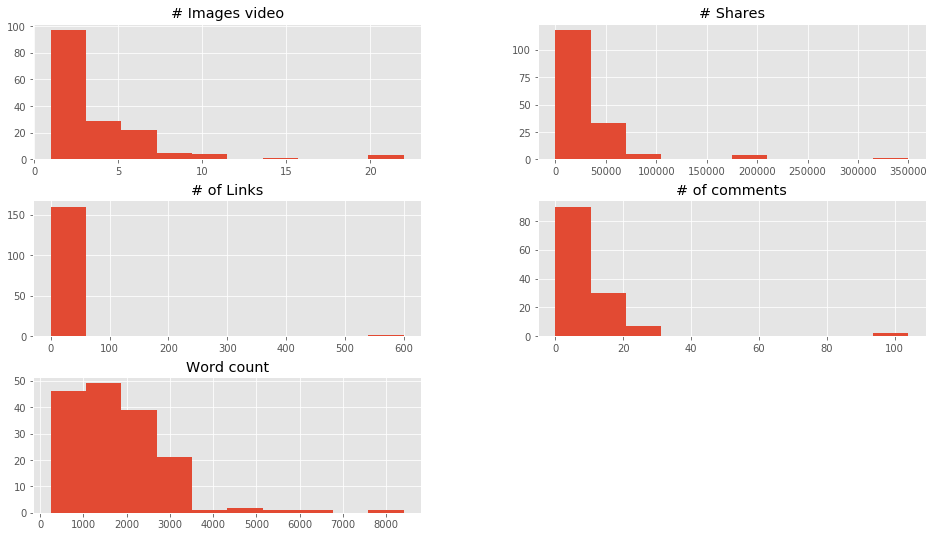

In [6]:
# Se visualiza los atributos de entrada mediante histogramas y barras ( cuantitativas y cuaitataivas)
data.drop(['Title','url','Elapsed days'],1).hist()
plt.show()

Las graficas anteriores comunican entre que valores se oncentran la mayoria de los registros. Seguidamente se filtran los datos por cantidad de palabras dejando los registros con menos de 3500 palabras y tambien #SHares con menos de 80.00.

## Se puede visualizar por ejemplo la Cantidad de palabras vs compartidos

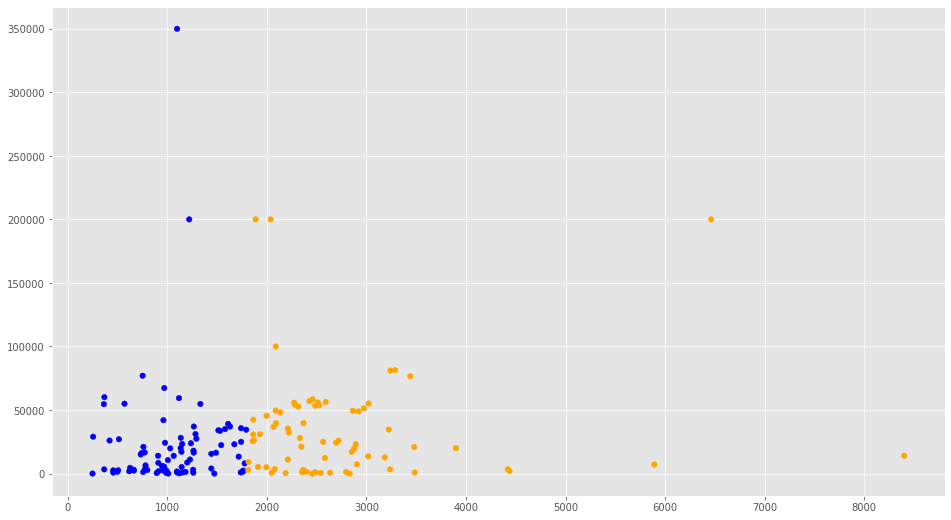

In [7]:
#Visualizar datos de entrada
colores = ['orange','blue']
tamanios=[30,60]

f1 = data['Word count'].values
f2 = data['# Shares'].values

#Pintar en 2 colores los puntos por debajo de la media de cantidad de palabras
asignar =[]
for index,row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
        
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

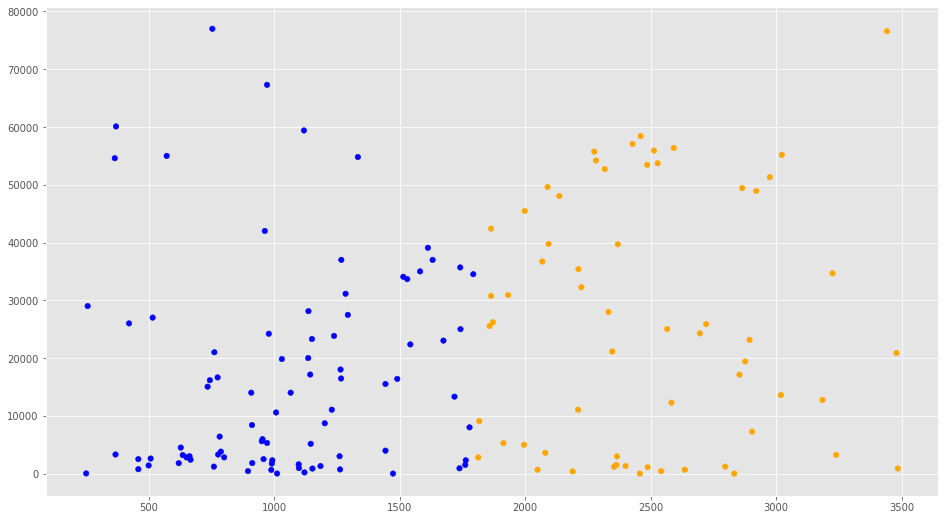

In [8]:
# VISUALIZAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

### Regresion lineal simple ( 1 atributo con Python y SKlearn)

In [9]:
#se asigna el atributo de entrada X para entrenamiento y las etiqueas Y
dataX = filtered_data[["Word count"]]
x_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

In [10]:
# Se genera el objeto de regresion lineal
regr = linear_model.LinearRegression()

# Se entrena el modelo 
regr.fit(x_train, y_train)

# Se realizan las predicciones
y_pred = regr.predict(x_train)

# Se revisan los coefientes obtenidos. En este caso la tangente
print('Coeficientes: \n', regr.coef_)
# Este es valor de donde corta el eje Y (x=0)
print('Termino Independiente: \n', regr.intercept_)
# Error cuadrado medio
print('Meida del error cudrado %.2f' % mean_squared_error(y_train, y_pred))
# Puntaje de varianza. El mejor puntaje es un 1.0
print('Puntaje de la varianza: %.2f' % r2_score(y_train, y_pred))

Coeficientes: 
 [5.69765366]
Termino Independiente: 
 11200.303223074163
Meida del error cudrado 372888728.34
Puntaje de la varianza: 0.06


De la ecuacuion de la recta y= mx=b la pendiente "m" es coeficiente de 5.69765366 y el termino idependiente "b" es 11200.303223074163. Existe un error cuadratico grande; por lo cual este modelo no es el mas adecuado. Pero estamos aprendiendo el funcionamiento del algoritmo, lo que resulta importante por el momento. Esto lo vemos reflejado en el untaje de la varianza de cual debe ser cerca de 1.0

## Visualizacion de la recta obtenida



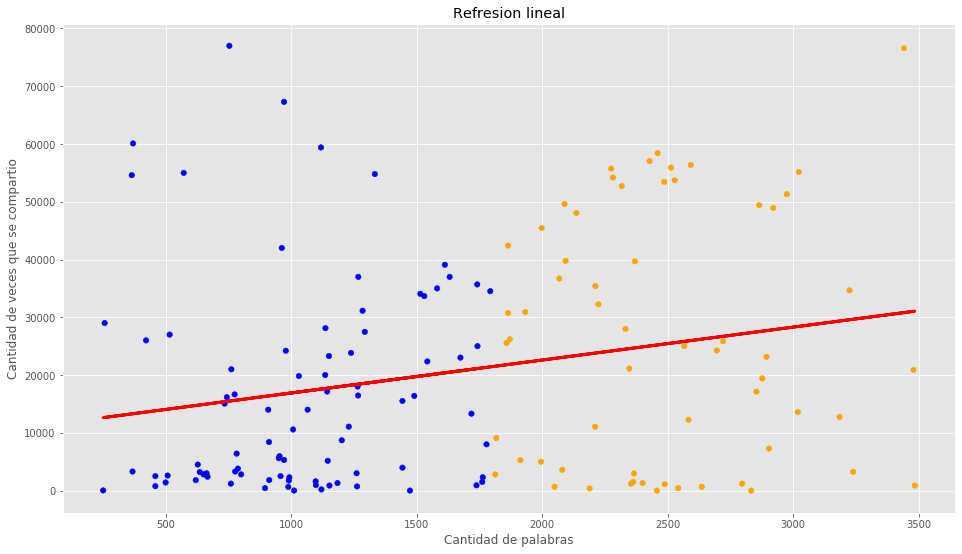

In [11]:
plt.scatter(x_train[:,0], y_train, c=asignar, s=tamanios[0])
plt.plot(x_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de palabras')
plt.ylabel('Cantidad de veces que se compartio')
plt.title('Refresion lineal')

plt.show()

## Prediccion 1

In [12]:
# Predecir
# Cuantoss "Shares" se obtendra d por un articulo de 2000 palabras
y_dosMil = regr.predict([[2000]])
print('Cantidad predecida:', int(y_dosMil))

Cantidad predecida: 22595


Devuelve una prediccion de 22595 "Shares" para un articulo de 2000 palabras.

Como podemos mejorar el modelo?:
### Regresion Lineal Multiple (multiples atributos)

Se mdifica el ejercicio utilizando mas de una variable de entrada para el modelo. Esto le da mayor precision de Machine Learning, de esta manera puede obtener predicciones mas complejas.

la ecuacion de la recta esta dada por :
    
    y= b + m1x1 + m2x2 +...+ m(n)x(n)
    
    (deja de ser una recta)
    
    En este caso, se utilizan 2 "atributos predictivos" para poder graficar en 3D.
    
    El primer atributo seguira siendo la cantidad de palabras y el segundo sera la suma de las 3 columnas de entrada ( cantiad de enlaces,comentarios y cantidad de imagenes).
    

In [13]:
# Se pudiera mejorar el modelo con una dimension mas
# Para poder graaficar en 3D, se incluye un archivo extra que son la union de enlaces, comentarios e imagenes.

union = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 = pd.DataFrame()
dataX2["Word count"] =  filtered_data["Word count"]
dataX2["Union"] = union
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values


In [14]:
# Se genera un nuevo objeto de regresion linea:

regr2 = linear_model.LinearRegression()

# Se entra el modelo, esta vez,con 2 dimensiones:

regr2.fit(XY_train, z_train)

# Se preddice con los puntos sobre el plano hallado:

z_pred = regr2.predict(XY_train)

#los coeficientres
print('Coeficientes: \n', regr2.coef_)

# Media del error cuadrado
print('Media del error cuadrado %.2f' % mean_squared_error(z_train, z_pred))

# Se evalua el puntuaje de varianza(siendo1.0 el mejor posible)
print('Putuaje de varianza: %.2f' % r2_score(z_train, z_pred))

Coeficientes: 
 [   6.63216324 -483.40753769]
Media del error cuadrado 352122816.48
Putuaje de varianza: 0.11


Como se aprecia, se obtuvieorn 2 coeficientes(cada uno correspondiente a 2 atributos predictivos), pues ahora lo que se grafica no es una linea si no un plano en 3 dimensiones.

El error obteido sigue siendo grande, aunque algo mejor que el anterior y el puntuaje de varianza mejora casi el dobble con respecto del anterior(aunque sigue siendo un mal resultado, esta lejos de 1).

##  Se visualiza un plano de 3 dimensiones

Text(0.5, 0.92, 'Regresion Lineal con Multiples Atributos')

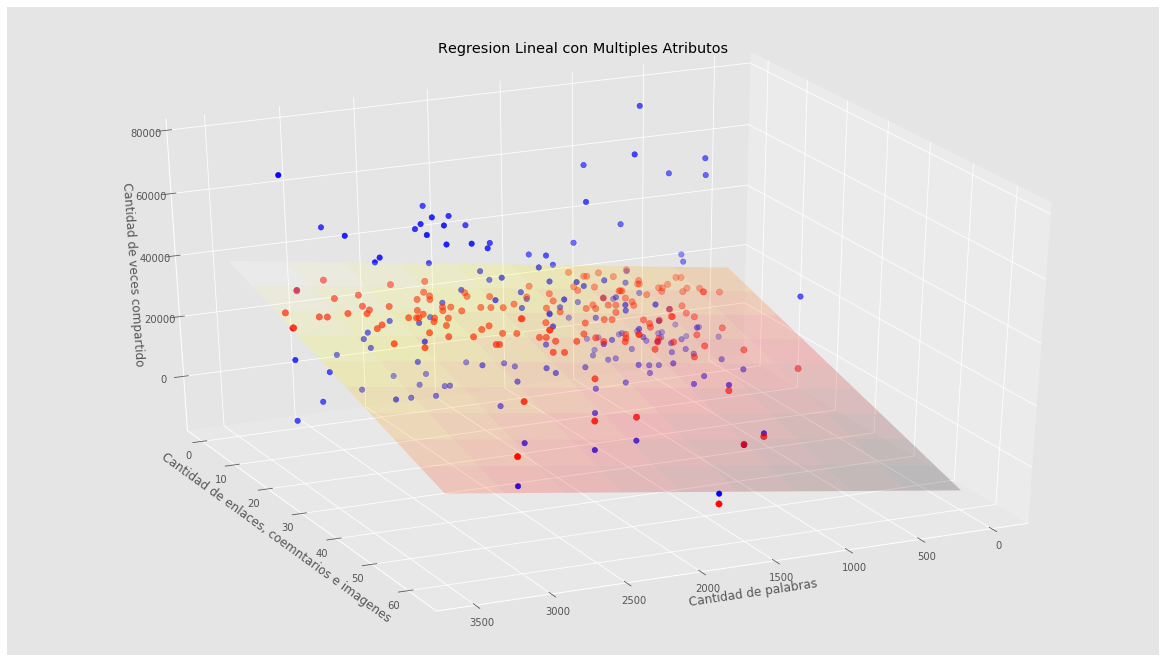

In [17]:
fig = plt.figure()
ax = Axes3D(fig)

# Segenera una malla, sobre la cual se grafica el plano 

xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# se calcula los valores del plano para los punto x y "y"
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)

# al igual que los correspondientes valores para z. Se debe sumar el punto de intercepcion:
z = ( nuevoX + nuevoY + regr2.intercept_)

# se Grafica el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# en azul los puntos en 3D
ax.scatter(XY_train[:,0], XY_train[:,1], z_train, c='blue', s=30)

ax.scatter(XY_train[:,0], XY_train[:,1], z_pred, c='red', s=40)

#con esto se situa la camara con la que se visualizara:
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Cantidad de palabras')
ax.set_ylabel('Cantidad de enlaces, coemntarios e imagenes')
ax.set_zlabel('Cantidad de veces compartido')
ax.set_title('Regresion Lineal con Multiples Atributos')